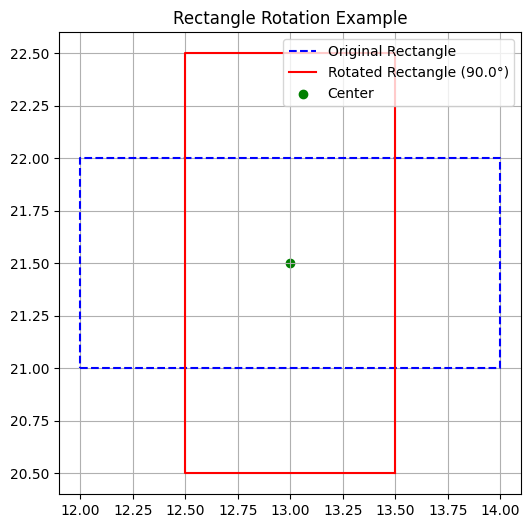

In [ ]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Function to create rectangle points
def create_rectangle(x, y, width, height):
    return np.array([
        [x, y],  # Bottom-left
        [x + width, y],  # Bottom-right
        [x + width, y + height],  # Top-right
        [x, y + height]   # Top-left
    ])

# Function to rotate points around a center
def rotate_rectangle(rect, angle_deg):
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    
    # Find the center of the rectangle
    center = np.mean(rect, axis=0)
    
    # Move rectangle to origin, rotate, move back
    translated = rect - center
    rotated = translated @ rotation_matrix.T
    return rotated + center

# === User Input ===
x = float(input("Enter bottom-left x coordinate of rectangle: "))
y = float(input("Enter bottom-left y coordinate of rectangle: "))
width = float(input("Enter width of rectangle: "))
height = float(input("Enter height of rectangle: "))
angle = float(input("Enter rotation angle in degrees: "))

# Create rectangle and rotate
rect = create_rectangle(x, y, width, height)
rotated_rect = rotate_rectangle(rect, angle)

# Close the rectangles for plotting (connect last to first)
rect_closed = np.vstack([rect, rect[0]])
rotated_rect_closed = np.vstack([rotated_rect, rotated_rect[0]])

# Plotting
plt.figure(figsize=(6,6))
plt.plot(rect_closed[:,0], rect_closed[:,1], 'b--', label='Original Rectangle')
plt.plot(rotated_rect_closed[:,0], rotated_rect_closed[:,1], 'r-', label=f'Rotated Rectangle ({angle}°)')
plt.scatter(*np.mean(rect, axis=0), color='green', label='Center')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.title("Rectangle Rotation Example")
plt.show()
